#### Applying dimensionality reduction using SVD

In [28]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
prod = pd.read_parquet("product_map.parquet", engine="fastparquet")
prodDetails = pd.read_parquet("products.parquet", engine="fastparquet")

#### Normalizing & Scaling down the aspect ratings

In [30]:
ratings = prodDetails[["review/appearance","review/aroma","review/palate","review/taste","review/overall"]]
ratings = ratings.div(5*np.linalg.norm(ratings.values, axis=1), axis=0)
ratings

,review/appearance,review/aroma,review/palate,review/taste,review/overall
0,0.087673,0.082997,0.086504,0.092349,0.097025
1,0.090271,0.086290,0.089076,0.088380,0.093057
2,0.096276,0.089251,0.091731,0.084293,0.085119
3,0.087448,0.091679,0.087448,0.091679,0.088858
4,0.094447,0.085684,0.086008,0.090228,0.090552
...,...,...,...,...,...
59189,0.089957,0.086037,0.088500,0.089605,0.092973
59190,0.093379,0.088021,0.084960,0.090317,0.090317
59191,0.089088,0.089040,0.088659,0.090326,0.090088
59192,0.092665,0.092665,0.087839,0.089769,0.083978


In [31]:
prod_concat = pd.concat([ratings, prod], axis=1)
prod_concat

,review/appearance,review/aroma,review/palate,review/taste,review/overall,small head,dark beer,good beer,good carbonation,spotty lacing,...,oily pour,nice smokiness,simple stout,stale corn,good quaffer,pure malt,old system,fine hop,secondary hop,shy note
0,0.087673,0.082997,0.086504,0.092349,0.097025,0.016710,0.183863,0.086504,0.122237,0.121565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.090271,0.086290,0.089076,0.088380,0.093057,0.014085,0.000000,0.051745,0.059825,0.039664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.096276,0.089251,0.091731,0.084293,0.085119,0.022396,0.035205,0.033126,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.087448,0.091679,0.087448,0.091679,0.088858,0.002851,0.000000,0.014759,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.094447,0.085684,0.086008,0.090228,0.090552,0.012149,0.095483,0.053907,0.012696,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,0.089957,0.086037,0.088500,0.089605,0.092973,0.018098,0.000000,0.074952,0.070608,0.039499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021536
59190,0.093379,0.088021,0.084960,0.090317,0.090317,0.008203,0.000000,0.021231,0.060003,0.044755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59191,0.089088,0.089040,0.088659,0.090326,0.090088,0.014444,0.000000,0.074771,0.059168,0.016812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59192,0.092665,0.092665,0.087839,0.089769,0.083978,0.000000,0.000000,0.000000,0.042074,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### Finding optimal number of features for SVD using explained variance

In [32]:
svd = TruncatedSVD(n_components=prod_concat.shape[1]-1)

In [33]:
svd.fit(prod_concat.values)

TruncatedSVD(n_components=2571)

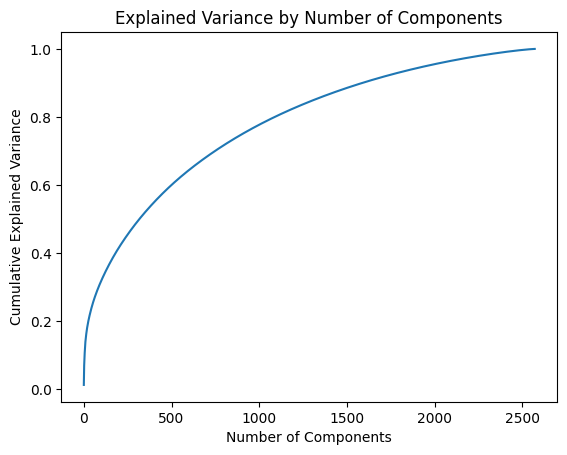

In [34]:
explained_variance = svd.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

In [37]:
cev = cumulative_explained_variance
sum(~(cev > .95)),sum(~(cev > .9)), sum(~(cev > .85)), sum(~(cev > .80)), sum(~(cev > .75))

(1953, 1587, 1311, 1088, 904)

### Reducing dimension for 90% explained variance

In [38]:
svd = TruncatedSVD(n_components=1587)

In [39]:
svd.fit(prod_concat.values)

TruncatedSVD(n_components=1587)

In [40]:
prodSVD1587 = svd.transform(prod_concat.values)

In [42]:
prod1587df = pd.DataFrame(prodSVD1587, columns= [str(i) for i in range(prodSVD1587.shape[1])])

In [43]:
prod1587df

,0,1,2,3,4,5,6,7,8,9,...,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586
0,0.333749,0.216011,-0.093927,-0.008924,0.037028,0.092456,0.009521,0.033235,0.037177,-0.091999,...,-0.009434,-0.007880,-0.035990,-0.003041,0.006786,0.002381,0.010689,0.023945,0.005784,0.022767
1,0.445398,-0.238162,-0.174833,0.024100,0.026211,0.241791,-0.182230,-0.003224,0.086476,-0.045430,...,0.004312,-0.000302,0.002009,0.006391,0.002494,0.008033,-0.005603,0.000516,-0.001080,-0.014703
2,0.345234,-0.104780,-0.026047,-0.045661,-0.011913,0.120133,-0.089138,-0.010917,0.008409,0.004525,...,-0.020131,-0.014850,0.004641,0.026547,-0.007660,0.007239,0.022065,0.017731,0.007805,-0.001987
3,0.216790,-0.017476,0.044001,-0.000530,0.002377,0.023616,-0.002997,-0.007545,0.011582,0.046398,...,0.008918,-0.017747,0.032461,0.027391,0.014423,-0.018606,-0.006245,0.040741,-0.028398,-0.007275
4,0.377916,0.142718,-0.023648,-0.002851,0.108707,0.166532,-0.090327,-0.007892,0.011814,-0.100999,...,-0.017574,0.004662,-0.009828,0.006949,-0.002354,-0.003730,0.008492,0.004975,0.002598,0.009030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,0.529078,-0.276589,-0.155238,0.074640,-0.008694,0.259544,-0.231228,-0.007357,0.123257,-0.070815,...,-0.000265,0.006997,0.000188,-0.001889,0.004524,0.002685,0.001374,0.012658,0.003094,0.006773
59190,0.333322,0.138196,0.097904,-0.057465,-0.015823,0.025472,0.006887,0.018928,0.003437,-0.061061,...,0.026038,0.011393,0.004831,0.012651,0.001739,-0.004260,-0.021101,0.033614,0.005429,0.034417
59191,0.387847,-0.165966,0.034086,0.138238,-0.126137,0.033647,-0.035417,0.032976,0.012000,-0.002832,...,-0.000089,-0.005065,0.003218,0.001466,0.006624,-0.000416,-0.010764,0.000766,-0.005099,-0.000121
59192,0.263018,-0.045824,0.075446,0.090389,0.017676,-0.021283,-0.060223,-0.001421,0.093082,0.087239,...,-0.010164,-0.005661,-0.007657,-0.013341,-0.000117,0.007936,-0.019270,0.009148,-0.044425,-0.015515


In [44]:
prod1587df.to_parquet("prodSVD/prod1587df.parquet", engine="fastparquet")